In [1]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BikeBuyer_csv.csv")

In [3]:
data.sample(10)

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,BikeBuyer
280,11414,Single,Male,80000,2,Partial College,Professional,Yes,1,10+ Miles,Europe,52,Yes
1375,19721,Single,Male,70000,0,Graduate Degree,Management,Yes,2,5-10 Miles,North America,53,Yes
591,24213,Single,Male,10000,0,Partial College,Manual,No,2,0-1 Miles,Europe,55,Yes
4746,18446,Married,Male,20000,0,High School,Skilled Manual,No,2,1-2 Miles,Pacific,59,No
812,18565,Married,Male,60000,0,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,36,Yes
1541,18224,Single,Female,90000,0,Partial College,Professional,No,1,5-10 Miles,North America,42,Yes
421,11442,Married,Male,90000,0,Partial High School,Skilled Manual,Yes,2,10+ Miles,Europe,58,No
5936,20772,Single,Female,80000,0,Graduate Degree,Skilled Manual,Yes,0,1-2 Miles,North America,48,No
5384,19729,Married,Female,60000,0,Graduate Degree,Management,Yes,2,10+ Miles,North America,68,No
7343,23495,Married,Male,70000,3,High School,Professional,Yes,0,5-10 Miles,North America,51,No


In [4]:
df = data[['Age','Yearly Income']]

# K-means with sklearn

In [5]:
from sklearn.preprocessing import MinMaxScaler
a = MinMaxScaler()
a.fit(df)
data_mms = a.transform(df)
data_mms = pd.DataFrame(data_mms,columns =['Age','Yearly Income'])
data_mms.head(10)

,Age,Yearly Income
0,0.112676,0.1250
1,0.169014,0.1875
2,0.422535,0.9375
3,0.309859,0.9375
4,0.183099,0.3750
5,0.211268,0.6875
6,0.338028,0.3750
7,0.338028,0.3125
8,0.183099,0.1250
9,0.295775,0.0625


<AxesSubplot:title={'center':'Scatter'}, xlabel='Age', ylabel='Yearly Income'>

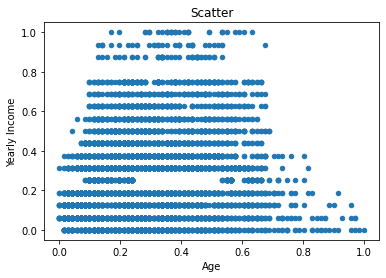

In [6]:
data_mms.plot(kind='scatter',x='Age', y='Yearly Income',title='Scatter')

In [7]:
from sklearn.cluster import KMeans

In [8]:
D=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    D.append(km.inertia_)

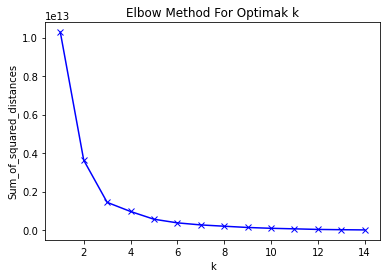

In [9]:
plt.plot(K,D, 'bx-')
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method For Optimak k")
plt.show()

CHỌN K = 3

In [10]:
modelKM = KMeans(n_clusters = 3)
modelKM = modelKM.fit(data_mms)
labels = modelKM.labels_
labels = pd.DataFrame(labels, columns = ["cluster"])
df_cluster = pd.concat([data_mms,labels], axis = 1)

In [11]:
df_cluster.groupby("cluster").size()

cluster
0    2938
1    4166
2    2896
dtype: int64

In [12]:
centroids = modelKM.cluster_centers_ 
centroids = pd.DataFrame(centroids,columns =['Centroids Age','Centroids YearlyIncome'])
centroids

,Centroids Age,Centroids YearlyIncome
0,0.464650,0.213623
1,0.145646,0.171852
2,0.303785,0.531250


<AxesSubplot:xlabel='Centroids Age', ylabel='Centroids YearlyIncome'>

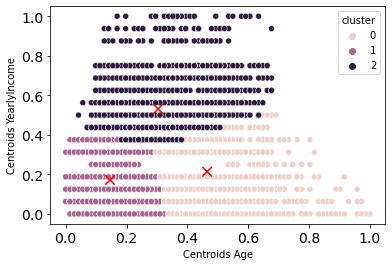

In [13]:
import seaborn as sns
s1=sns.scatterplot(data=df_cluster,x='Age', y='Yearly Income', hue = 'cluster')
centroids.plot(ax=s1, kind='scatter', x='Centroids Age',
               y='Centroids YearlyIncome', color = 'red', fontsize=14, marker='x', s=[90,90,90])


# K-means without sklearn

In [22]:
class KMeans():
  def __init__(self, k, max_iteration=10):
      self.k = k
      self.max_iteration = max_iteration
      self.all_centroids = []
      self.all_labels = []

  # Hàm thuật toán k-Means lấy đầu vào là một bộ dữ liệu và số lượng cluster k. Trẻ về tâm của k cụm
  def fit(self, data):
      # Khởi tạo ngẫu nhiên k centroids
      numFeatures = data.shape[1]
      centroids = self.get_random_centroids(numFeatures, self.k)
      self.all_centroids.append(centroids)
      self.all_labels.append(None)

      # Khởi tạo các biến iterations, oldCentroids
      iterations = 0
      oldCentroids = None
      
      # Vòng lặp cập nhật centroids trong thuật toán k-Means
      while not self.should_stop(oldCentroids, centroids, iterations):
          # Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
          oldCentroids = centroids
          iterations += 1
          
          # Gán nhãn cho mỗi diểm dữ liệu dựa vào centroids
          labels = self.get_labels(data, centroids)
          self.all_labels.append(labels)

          # Cập nhật centroids dựa vào nhãn dữ liệu
          # print('0ld centroids: ', centroids)
          centroids = self.get_centroids(data, labels, self.k)
          # print('new centroids: ', centroids)
          self.all_centroids.append(centroids)
  
      return centroids

  # Hàm khởi tạo centroids ngẫu nhiên
  def get_random_centroids(self, numFeatures, k):
    return np.random.rand(k, numFeatures)
    # return np.array([[-5., -5.],
    #                  [4., 6.]])

  # Hàm này trả về nhãn cho mỗi điểm dữ liệu trong datasets
  def get_labels(self, data, centroids):
      # Với mỗi quan sát trong dataset, lựa chọn centroids gần nhất để gán label cho dữ liệu.
      labels = []
      for x in data:
        # Tính khoảng cách tới các centroids và cập nhận nhãn
        distances = np.sum((x-centroids)**2, axis=1)
        label = np.argmin(distances)
        labels.append(label)
      return labels
      
  # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
  # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
  def should_stop(self, oldCentroids, centroids, iterations):
      if iterations > self.max_iteration: 
        return True
      return np.all(oldCentroids == centroids)

  # Trả về toan độ mới cho k centroids của mỗi chiều.
  def get_centroids(self, data, labels, k):
      centroids = []
      for j in np.arange(k):
        # Lấy index cho mỗi centroids
        idx_j = np.where(np.array(labels) == j)[0]
        centroid_j = data[idx_j,:].mean(axis=0)
        centroids.append(centroid_j)
      return np.array(centroids)

In [23]:
data_mms = data_mms.values

In [24]:
kmean = KMeans(k=3, max_iteration=8)
centroids = kmean.fit(data_mms)

In [25]:
centroids

array([[0.15376841, 0.16697631],
       [0.29702628, 0.53045038],
       [0.47485197, 0.22448251]])

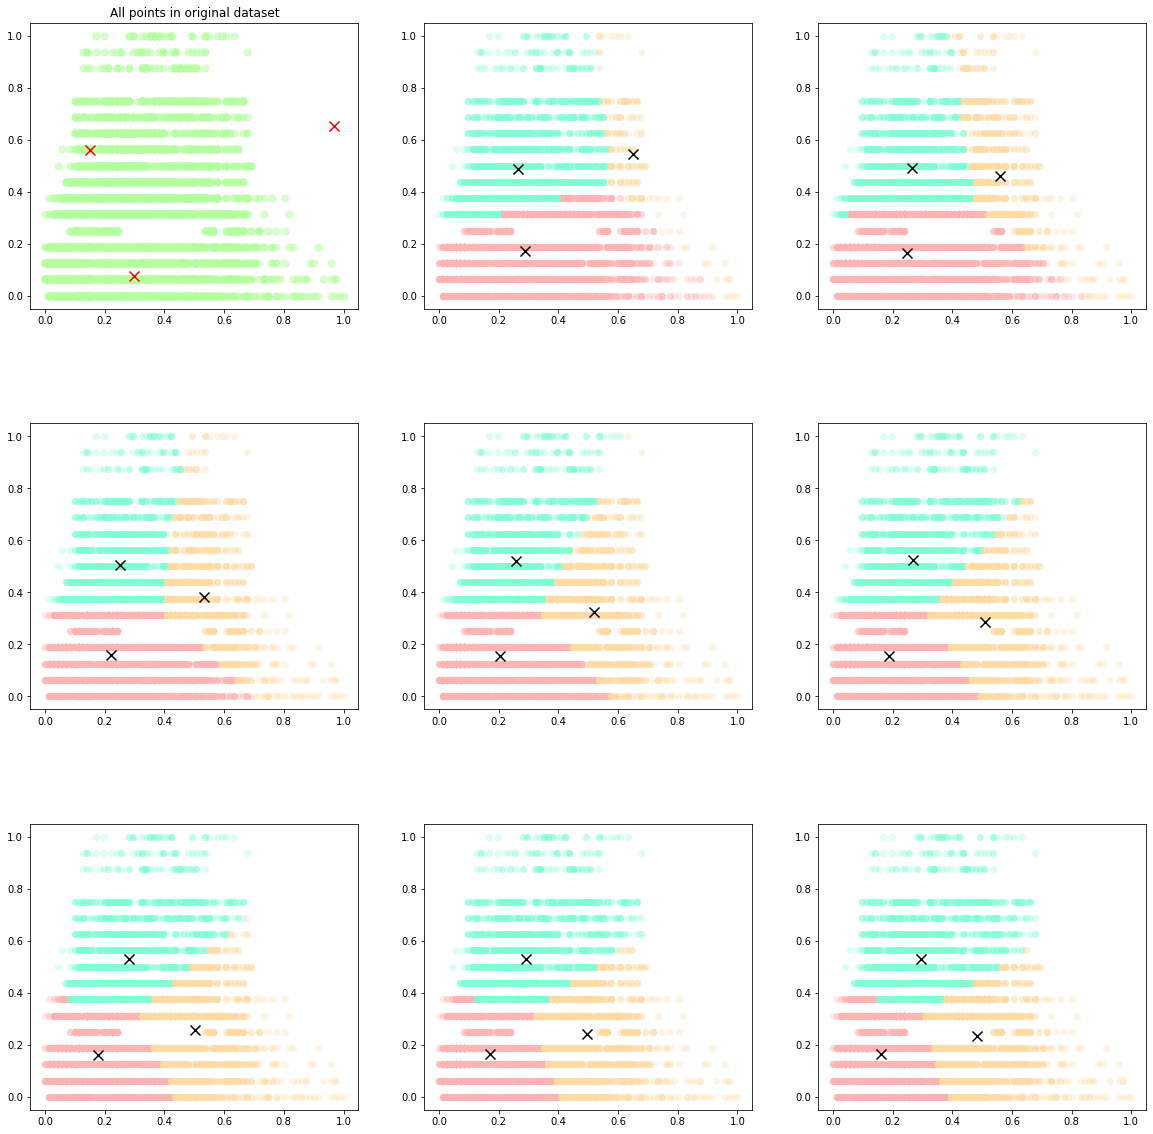

In [26]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(nrows=3, ncols=3)
plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
colors = [ '#FFB3B3', '#7fffd4', '#FFDBA4',]
labels = ['cluster 1', 'cluster 2', 'cluster 3']

for i in np.arange(len(kmean.all_centroids)):
    try:
        ax = plt.subplot(gs[i])
        if i == 0:
            centroids_i = kmean.all_centroids[i]
            plt.scatter(data_mms[:, 0], data_mms[:, 1], s=50, alpha=0.5, color='#B4FF9F')
            for j in np.arange(kmean.k):
                  plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', s=100, color='red')
                  plt.title('All points in original dataset')
        else:
    # Lấy centroids và labels tại bước thứ i
            centroids_i = kmean.all_centroids[i]
            labels_i = kmean.all_labels[i]
    # Visualize các điểm cho từng cụm
            for j in np.arange(kmean.k):
                  idx_j = np.where(np.array(labels_i) == j)[0]
                  plt.scatter(data_mms[idx_j, 0], data_mms[idx_j, 1], color=colors[j], label=labels[j], s=50, alpha=0.3, lw = 0)
                  plt.scatter(centroids_i[j, 0], centroids_i[j, 1], marker='x', color='black', s=100, label=labels[j])
    except IndexError: 
            pass

Centroids are: [[0.46565036 0.21484108]
 [0.14602009 0.16867123]
 [0.30077685 0.52832429]]


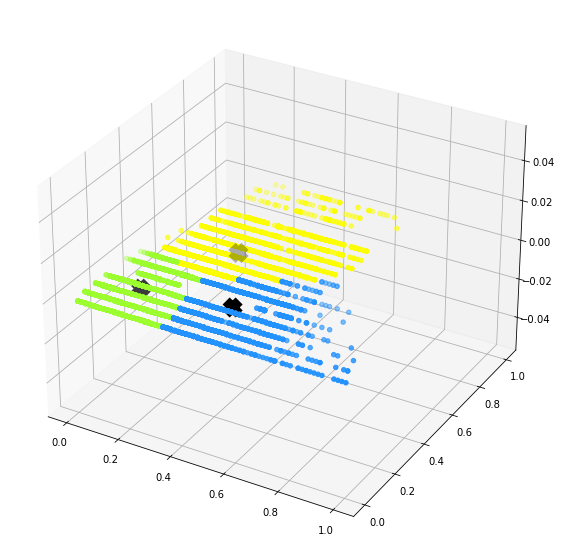

In [33]:
from sklearn.datasets import make_swiss_roll
# import matplotlib.pyplot as plt
# X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)                   # Number of clusters == 3
kmeans = kmeans.fit(data_mms)                          # Fitting the input data
labels = kmeans.predict(data_mms)                      # Getting the cluster labels
centroids = kmeans.cluster_centers_             # Centroid values
print("Centroids are:", centroids)              # From sci-kit learn

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x = np.array(labels==0)
y = np.array(labels==1)
z = np.array(labels==2)


ax.scatter(data_mms[x][:, 0], data_mms[x][:, 1], color='#2192FF')
ax.scatter(data_mms[y][:, 0], data_mms[y][:, 1], color='#9CFF2E')
ax.scatter(data_mms[z][:, 0], data_mms[z][:, 1], color='#FDFF00')
ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=10,
            color='black', zorder=50)